# **Brett Huffman**

## **CSCI 5390**

## Main Project - Phase 6

For this phase, the entire model is moved to leverating a pretrained model (VGG16 and ???)

Credit: The images for this project are from personal library and from Alamy.com covered under their Personal Use license.  Images can only be used for non-commercial purposes. 

In [2]:
!git clone https://github.com/dicer2000/CSCI_5390

Cloning into 'CSCI_5390'...
remote: Enumerating objects: 1034, done.
remote: Counting objects: 100% (1034/1034), done.
remote: Compressing objects: 100% (1014/1014), done.
remote: Total 1034 (delta 23), reused 1030 (delta 19), pack-reused 0
Receiving objects: 100% (1034/1034), 35.38 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
# Checkout just the images folder from Github
! ls -l CSCI_5390/MainProject/Images

total 32
drwxr-xr-x 2 root root  4096 Apr 18 15:05 Ash
drwxr-xr-x 2 root root  4096 Apr 18 15:05 Cedar
drwxr-xr-x 2 root root 12288 Apr 18 15:05 Honeysuckle
drwxr-xr-x 2 root root  4096 Apr 18 15:05 Maple
drwxr-xr-x 2 root root  4096 Apr 18 15:05 Oak
-rw-r--r-- 1 root root   593 Apr 18 15:05 removeBlack.py


In [4]:
# Check out the index file
import pandas as pd
df = pd.read_csv('CSCI_5390/MainProject/TreeImageMaster.csv')
df.head()

,id,image,treetype
0,1,Images/Oak/oak125.jpeg,1
1,2,Images/Oak/oak133.jpeg,1
2,3,Images/Oak/oak42.jpg,1
3,4,Images/Oak/oak56.jpg,1
4,5,Images/Oak/oak81.jpg,1


In [5]:
# Import important libraries
import tensorflow as tf
import numpy as np
import math
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import layers, initializers
import matplotlib.pyplot as plt
from tensorflow import keras

In [6]:
# Generate the Validation And Test Folders

!mkdir CSCI_5390/MainProject/Training
!mkdir CSCI_5390/MainProject/Training/Images
!mkdir CSCI_5390/MainProject/Training/Images/Other
!mkdir CSCI_5390/MainProject/Training/Images/Honeysuckle

!mkdir CSCI_5390/MainProject/Validation
!mkdir CSCI_5390/MainProject/Validation/Images
!mkdir CSCI_5390/MainProject/Validation/Images/Other
!mkdir CSCI_5390/MainProject/Validation/Images/Honeysuckle

!mkdir CSCI_5390/MainProject/Testing
!mkdir CSCI_5390/MainProject/Testing/Images
!mkdir CSCI_5390/MainProject/Testing/Images/Other
!mkdir CSCI_5390/MainProject/Testing/Images/Honeysuckle


In [7]:

# Randomly move images from the main folder (Training) to Validation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = shuffle(df)
npdata = np.asarray(df)

# 70% Training, 15% Test, 15 Validation
X = npdata[:, :-1]
y = npdata[:, -1]
XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(X, y, test_size=0.3)
XVALID, XTEST, YVALID, YTEST = train_test_split(XVALID, YVALID, test_size=0.5)


In [8]:
print(XTRAIN.shape, YTRAIN.shape)
print(XTEST.shape, YTEST.shape)
print(XVALID.shape, YVALID.shape)

(557, 2) (557,)
(120, 2) (120,)
(120, 2) (120,)


In [9]:
# Move all the designated files over to the Training folders

for file in XTRAIN[:,1]:
  filename = str(file).strip()
  origFile = "CSCI_5390/MainProject/" + filename
  newFile = ""

  if "Honeysuckle" in filename:
    newFile  = "CSCI_5390/MainProject/Training/" + filename
  else:
    loc = filename.rfind("/")-1
    newFile  = "CSCI_5390/MainProject/Training/Images/Other" + filename[loc+1:]

  print('-----')
  print(filename)
  print(newFile)
  print(origFile)


  !mv $origFile $newFile


-----
Images/Ash/ash80.jpeg
CSCI_5390/MainProject/Training/Images/Other/ash80.jpeg
CSCI_5390/MainProject/Images/Ash/ash80.jpeg
-----
Images/Honeysuckle/hs177.jpeg
CSCI_5390/MainProject/Training/Images/Honeysuckle/hs177.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs177.jpeg
-----
Images/Honeysuckle/hs126.jpeg
CSCI_5390/MainProject/Training/Images/Honeysuckle/hs126.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs126.jpeg
-----
Images/Honeysuckle/hs150.jpeg
CSCI_5390/MainProject/Training/Images/Honeysuckle/hs150.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs150.jpeg
-----
Images/Oak/oak128.jpeg
CSCI_5390/MainProject/Training/Images/Other/oak128.jpeg
CSCI_5390/MainProject/Images/Oak/oak128.jpeg
-----
Images/Maple/mpl9.jpg
CSCI_5390/MainProject/Training/Images/Other/mpl9.jpg
CSCI_5390/MainProject/Images/Maple/mpl9.jpg
-----
Images/Honeysuckle/hs139.jpeg
CSCI_5390/MainProject/Training/Images/Honeysuckle/hs139.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs139.jpeg
-----
Images/Cedar/cdr

In [10]:
# Move all the designated files over to the Validation folders

for file in XVALID[:,1]:
  filename = str(file).strip()
  origFile = "CSCI_5390/MainProject/" + filename
  newFile = ""

  if "Honeysuckle" in filename:
    newFile  = "CSCI_5390/MainProject/Validation/" + filename
  else:
    loc = filename.rfind("/")-1
    newFile  = "CSCI_5390/MainProject/Validation/Images/Other" + filename[loc+1:]

  print('-----')
  print(filename)
  print(newFile)
  print(origFile)


  !mv $origFile $newFile

-----
Images/Ash/ash121.jpeg
CSCI_5390/MainProject/Validation/Images/Other/ash121.jpeg
CSCI_5390/MainProject/Images/Ash/ash121.jpeg
-----
Images/Cedar/cdr127.jpeg
CSCI_5390/MainProject/Validation/Images/Other/cdr127.jpeg
CSCI_5390/MainProject/Images/Cedar/cdr127.jpeg
-----
Images/Oak/oak126.jpeg
CSCI_5390/MainProject/Validation/Images/Other/oak126.jpeg
CSCI_5390/MainProject/Images/Oak/oak126.jpeg
-----
Images/Oak/oak59.jpg
CSCI_5390/MainProject/Validation/Images/Other/oak59.jpg
CSCI_5390/MainProject/Images/Oak/oak59.jpg
-----
Images/Cedar/cdr11.jpg
CSCI_5390/MainProject/Validation/Images/Other/cdr11.jpg
CSCI_5390/MainProject/Images/Cedar/cdr11.jpg
-----
Images/Oak/oak151.jpeg
CSCI_5390/MainProject/Validation/Images/Other/oak151.jpeg
CSCI_5390/MainProject/Images/Oak/oak151.jpeg
-----
Images/Ash/ash83.jpeg
CSCI_5390/MainProject/Validation/Images/Other/ash83.jpeg
CSCI_5390/MainProject/Images/Ash/ash83.jpeg
-----
Images/Honeysuckle/hs231.jpeg
CSCI_5390/MainProject/Validation/Images/Honeysu

In [11]:
# Move all the designated files over to the Test folders
for file in XTEST[:,1]:
  filename = str(file).strip()
  origFile = "CSCI_5390/MainProject/" + filename
  newFile = ""

  if "Honeysuckle" in filename:
    newFile  = "CSCI_5390/MainProject/Testing/" + filename
  else:
    loc = filename.rfind("/")-1
    newFile  = "CSCI_5390/MainProject/Testing/Images/Other" + filename[loc+1:]

  print('-----')
  print(filename)
  print(newFile)
  print(origFile)



  !mv $origFile $newFile


-----
Images/Maple/mpl22.jpg
CSCI_5390/MainProject/Testing/Images/Other/mpl22.jpg
CSCI_5390/MainProject/Images/Maple/mpl22.jpg
-----
Images/Maple/mpl11.jpg
CSCI_5390/MainProject/Testing/Images/Other/mpl11.jpg
CSCI_5390/MainProject/Images/Maple/mpl11.jpg
-----
Images/Maple/mpl88.jpeg
CSCI_5390/MainProject/Testing/Images/Other/mpl88.jpeg
CSCI_5390/MainProject/Images/Maple/mpl88.jpeg
-----
Images/Oak/oak147.jpeg
CSCI_5390/MainProject/Testing/Images/Other/oak147.jpeg
CSCI_5390/MainProject/Images/Oak/oak147.jpeg
-----
Images/Oak/oak65.jpg
CSCI_5390/MainProject/Testing/Images/Other/oak65.jpg
CSCI_5390/MainProject/Images/Oak/oak65.jpg
-----
Images/Honeysuckle/hs58.jpeg
CSCI_5390/MainProject/Testing/Images/Honeysuckle/hs58.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs58.jpeg
-----
Images/Cedar/cdr40.jpg
CSCI_5390/MainProject/Testing/Images/Other/cdr40.jpg
CSCI_5390/MainProject/Images/Cedar/cdr40.jpg
-----
Images/Maple/mpl122.jpeg
CSCI_5390/MainProject/Testing/Images/Other/mpl122.jpeg
CSCI_5

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
#my_generator.fit(XTRAIN)


In [13]:
# Generator for training dataset
# Before: , batch_size=18
train_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Training/Images', target_size=(224, 224), class_mode='categorical')


Found 557 images belonging to 2 classes.


In [14]:
# Generator for validation dataset
validation_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Validation/Images', target_size=(224, 224), class_mode='categorical')


Found 120 images belonging to 2 classes.


In [15]:
# Generator for Test dataset
test_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Testing/Images', target_size=(224, 224), class_mode='categorical')


Found 120 images belonging to 2 classes.


In [16]:
# Check out the data shapes
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

#print( labels_batch)

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 2)


Shape:  (32, 224, 224, 3)


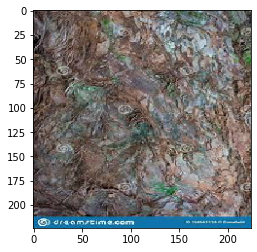

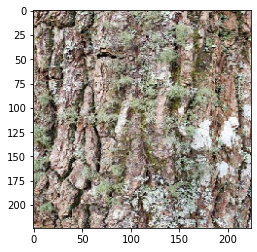

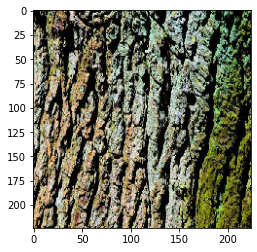

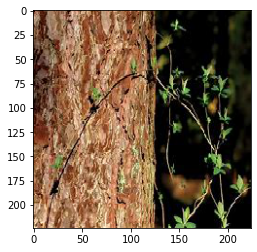

In [17]:
# Check out the images
for _ in range(1):
    img, label = train_dataset.next()
    print("Shape: ", img.shape)
#    print("Data: ", img) 
    plt.imshow(img[0])
    plt.show()
    plt.imshow(img[1])
    plt.show()
    plt.imshow(img[2])
    plt.show()
    plt.imshow(img[3])
    plt.show()
  

## Setup Convolutional Base
Using Cropnet Classifier from TFHub

In [18]:
import tensorflow_hub as hub
conv_base = hub.KerasLayer('https://tfhub.dev/google/cropnet/feature_vector/concat/1')
conv_base.trainable = False

In [19]:
# Create an copy of VGG16
#conv_base = keras.applications.vgg16.VGG16(
#    weights="imagenet",
#    include_top=False,
#    input_shape=(224, 224, 3)
#)
#conv_base.trainable = False

In [20]:
# Create an copy of DenseNet121
#conv_base = keras.applications.densenet.DenseNet121(
#    weights="imagenet",
#    include_top=False
#)
#conv_base.trainable = False

In [39]:
# Try out with many Pre-Trained Models and Regularization

from keras import regularizers
from keras.regularizers import L1

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel.hdf5",
        save_best_only=True,
        monitor="val_loss"), # When we have validation data
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        patience=40, 
        verbose=1)
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)    # Use for With Augmentation

#x = keras.applications.vgg16.preprocess_input(x)  # Using VGG16

x = conv_base(x)

x = layers.Flatten()(x)
#x = layers.Dense(64,  kernel_regularizer=regularizers.l2(0.002))(x) # ,  use_bias=False
x = layers.Dense(32,  kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.Dense(8,  kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(2, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [40]:
# Let loose the dogs
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=250, batch_size=40, callbacks=callbacks)

Epoch 1/250
18/18 [==============================] - 5s 148ms/step - loss: 109.3054 - accuracy: 0.5314 - val_loss: 103.4386 - val_accuracy: 0.7000
Epoch 2/250
18/18 [==============================] - 2s 113ms/step - loss: 76.3861 - accuracy: 0.6571 - val_loss: 64.1234 - val_accuracy: 0.7167
Epoch 3/250
18/18 [==============================] - 2s 94ms/step - loss: 60.4870 - accuracy: 0.6643 - val_loss: 77.6934 - val_accuracy: 0.7167
Epoch 4/250
18/18 [==============================] - 2s 110ms/step - loss: 46.3435 - accuracy: 0.6786 - val_loss: 42.0047 - val_accuracy: 0.7083
Epoch 5/250
18/18 [==============================] - 2s 94ms/step - loss: 46.0663 - accuracy: 0.6786 - val_loss: 70.6409 - val_accuracy: 0.7083
Epoch 6/250
18/18 [==============================] - 2s 103ms/step - loss: 35.4276 - accuracy: 0.6840 - val_loss: 49.1356 - val_accuracy: 0.7417
Epoch 7/250
18/18 [==============================] - 2s 94ms/step - loss: 64.9008 - accuracy: 0.6822 - val_loss: 59.6572 - val_acc

In [41]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              15581216  
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_7 (Dense)             (None, 32)                40992     
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0   

In [42]:
# Loads the weights
model.load_weights("BestModel.hdf5")

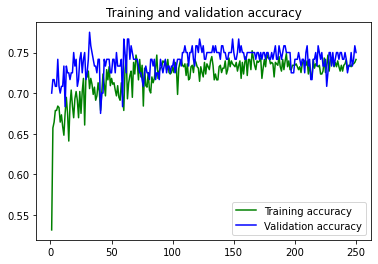

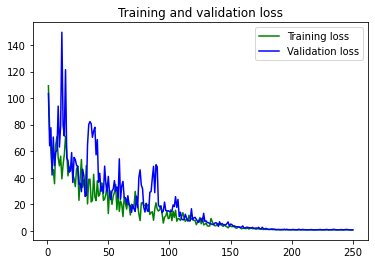

In [43]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [32]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [48]:
# When using generators, you can calculate precision, recall, F1-score, etc. using the following idea (roughly)
Y = [] # empty list of true labels
P = [] # empty list of predictions


for _ in range(1):
  img, label = test_dataset.next()
  p = model.predict(img)
  Y.extend(label)
  P.extend(p)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, p.round())
precision = precision_score(Y, p.round(), average="macro") # precision_score(Y, p.round())
recall = recall_score(Y, p.round(), average="macro")
f1 = f1_score(Y, p.round(), average="macro")

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Accuracy:  0.65625
Precision:  0.5833333333333333
Recall:  0.5216450216450216
F1:  0.46907993966817496
